# Imports modules

In [301]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Imports data and formats columns

In [302]:
nbafull = pd.read_csv("https://raw.githubusercontent.com/rwadswo12/Sample-Project-CS504/main/Cleaned%20NBA%20Stats.csv") #full dataset in datatable
nbafull = nbafull.astype({"Season": str}) #Changing column type. use this line to change additional columns to other types.

nbaap = nbafull.drop(['W' , 'L' , '+/-'], axis = 1) #datatable with only averages and percentages.

print(nbaap.info())
print()
print()
print('Columns in datatable:')
print()
print(nbaap.columns)
print()
print('Values in datatable:')
print()
print()
print(nbaap.values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 27 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Season     772 non-null    object 
 1   Team       772 non-null    object 
 2   GP         772 non-null    int64  
 3   WIN %      772 non-null    float64
 4   MIN        772 non-null    float64
 5   PTS        772 non-null    float64
 6   FGM        772 non-null    float64
 7   FGA        772 non-null    float64
 8   FG%        772 non-null    float64
 9   3PM        772 non-null    float64
 10  3PA        772 non-null    float64
 11  3P%        772 non-null    float64
 12  FTM        772 non-null    float64
 13  FTA        772 non-null    float64
 14  FT%        772 non-null    float64
 15  OREB       772 non-null    float64
 16  DREB       772 non-null    float64
 17  REDB       772 non-null    float64
 18  AST        772 non-null    float64
 19  TOV        772 non-null    float64
 20  STL       

### Filters data

In [303]:
nba22 = nbaap[nbaap["Season"] == "2022"] #filters by year
nba20 = nbaap[nbaap["Season"] == "2020"]
nba18 = nbaap[nbaap["Season"] == "2018"]
nba17 = nbaap[nbaap["Season"] == "2017"]
nba16 = nbaap[nbaap["Season"] == "2016"]
nba15 = nbaap[nbaap["Season"] == "2015"]
nba14 = nbaap[nbaap["Season"] == "2014"]
nba13 = nbaap[nbaap["Season"] == "2013"]
nba12 = nbaap[nbaap["Season"] == "2012"]
nba11 = nbaap[nbaap["Season"] == "2011"]
nba10 = nbaap[nbaap["Season"] == "2010"]
nba09 = nbaap[nbaap["Season"] == "2009"]
nba08 = nbaap[nbaap["Season"] == "2008"]
nba07 = nbaap[nbaap["Season"] == "2007"]
nba06 = nbaap[nbaap["Season"] == "2006"]
nba05 = nbaap[nbaap["Season"] == "2005"]
nba04 = nbaap[nbaap["Season"] == "2004"]
nba03 = nbaap[nbaap["Season"] == "2003"]
nba02 = nbaap[nbaap["Season"] == "2002"]
nba01 = nbaap[nbaap["Season"] == "2001"]
nba00 = nbaap[nbaap["Season"] == "2000"]
nba99 = nbaap[nbaap["Season"] == "1999"]
nba98 = nbaap[nbaap["Season"] == "1998"]
nba97 = nbaap[nbaap["Season"] == "1997"]

nbahawks = nbaap[nbaap["Team"] == "Atlanta Hawks"] #Filters by team. These filters may not be needed but they are available. We can delete after 
nbaceltics = nbaap[nbaap["Team"] == "Boston Celtics"]
nbanets = nbaap[nbaap["Team"] == "Brooklyn Nets"]
nbahornets = nbaap[nbaap["Team"] == "Charlotte Hornets"]
nbabulls = nbaap[nbaap["Team"] == "Chicago Bulls"]
nbacavs = nbaap[nbaap["Team"] == "Cleveland Cavaliers"]
nbamavs = nbaap[nbaap["Team"] == "Dallas Mavericks"]
nbanuggs = nbaap[nbaap["Team"] == "Denver Nuggets"]
nbapistons = nbaap[nbaap["Team"] == "Detroit Pistons"]
nbagsw = nbaap[nbaap["Team"] == "Golden State Warriors"]
nbarockets = nbaap[nbaap["Team"] == "Houston Rockets"]
nbapacers = nbaap[nbaap["Team"] == "Indiana Pacers"]
nbaclippers = nbaap[nbaap["Team"] == "Los Angeles Clippers"]
nbalakers = nbaap[nbaap["Team"] == "Los Angeles Lakers"]
nbagrizz = nbaap[nbaap["Team"] == "Memphis Grizzlies"]
nbaheat = nbaap[nbaap["Team"] == "Miami Heat"]
nbabucks = nbaap[nbaap["Team"] == "Milwaukee Bucks"]
nbawolves = nbaap[nbaap["Team"] == "Minnesota Timberwolves"]
nbapelicans = nbaap[nbaap["Team"] == "New Orleans Pelicans"]
nbaknicks = nbaap[nbaap["Team"] == "New York Knicks"]
nbaokc = nbaap[nbaap["Team"] == "Oklahoma City Thunder"]
nbamagic = nbaap[nbaap["Team"] == "Orlando Magic"]
nba76ers = nbaap[nbaap["Team"] == "Philadelphia 76ers"]
nbasuns = nbaap[nbaap["Team"] == "Phoenix Suns"]
nbablazers = nbaap[nbaap["Team"] == "Portland Trail Blazers"]
nbakings = nbaap[nbaap["Team"] == "Sacramento Kings"]
nbaspurs = nbaap[nbaap["Team"] == "San Antonio Spurs"]
nbaraptors = nbaap[nbaap["Team"] == "Toronto Raptors"]
nbajazz = nbaap[nbaap["Team"] == "Utah Jazz"]
nbawizards = nbaap[nbaap["Team"] == "Washington Wizards"]

In [304]:
## Dataset of independent variables. Dropped Season, Team, and Games Played
ind_var = nbaap.drop(nbaap.columns[[0, 1, 2]], axis=1)  

## Generate correlation coefficient
corr=ind_var.corr()
corr.head()

,WIN %,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,...,REDB,AST,TOV,STL,BLK,BLKA,PF,PFD,Salary,Champion?
WIN %,1.000000,-0.011841,0.292129,0.253992,-0.088707,0.586503,0.165368,0.099441,0.451902,0.162039,...,0.230754,0.328135,-0.345082,0.108860,0.206178,-0.481321,-0.192472,0.007554,0.128690,0.279747
MIN,-0.011841,1.000000,-0.038351,-0.030003,-0.016711,-0.030496,-0.070352,-0.069560,-0.007045,0.042726,...,-0.018884,-0.034084,0.039191,-0.023421,0.062530,-0.003182,0.077193,0.003884,-0.054466,-0.087029
PTS,0.292129,-0.038351,1.000000,0.938407,0.783107,0.591198,0.825910,0.799650,0.361634,-0.001341,...,0.567565,0.636944,-0.260008,0.058466,0.031449,-0.172183,-0.278190,0.519449,0.728235,0.075485
FGM,0.253992,-0.030003,0.938407,1.000000,0.836256,0.627070,0.716302,0.691308,0.322897,-0.211561,...,0.573138,0.703635,-0.291643,0.080428,0.057040,-0.175302,-0.319124,0.478677,0.687013,0.098265
FGA,-0.088707,-0.016711,0.783107,0.836256,1.000000,0.098596,0.713793,0.738521,0.008698,-0.353942,...,0.674204,0.517957,-0.229934,0.125720,0.002417,0.093057,-0.287156,0.388080,0.658194,-0.015246


<AxesSubplot:>

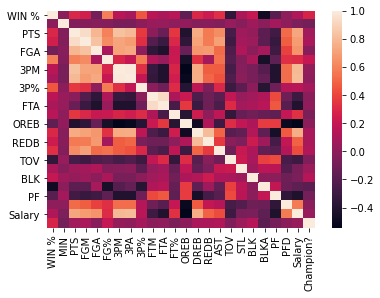

In [305]:
## Heatmap of correlation coefficient
sns.heatmap(corr)

In [306]:
## Removed one of two features that have a correlation higher than 0.9. I've read it can be between .85-.9 and can be adjusted

columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
                
selected_columns = ind_var.columns[columns]
selected_columns.shape                

(21,)

In [307]:
## 21 columns remaining
final = ind_var[selected_columns]

selected_columns = selected_columns[:,21].values  

import statsmodels.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns

SL = 0.05
data_modeled, selected_columns = backwardElimination(data.iloc[:,1:].values, data.iloc[:,0].values, SL, selected_columns)

In [309]:
result = pd.DataFrame()
result['Champion?'] = data.iloc[:,20]

final = pd.DataFrame(data = data_modeled, columns = selected_columns)

C:\Users\Ray\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ray\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ray\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level fun

C:\Users\Ray\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ray\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ray\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level fun

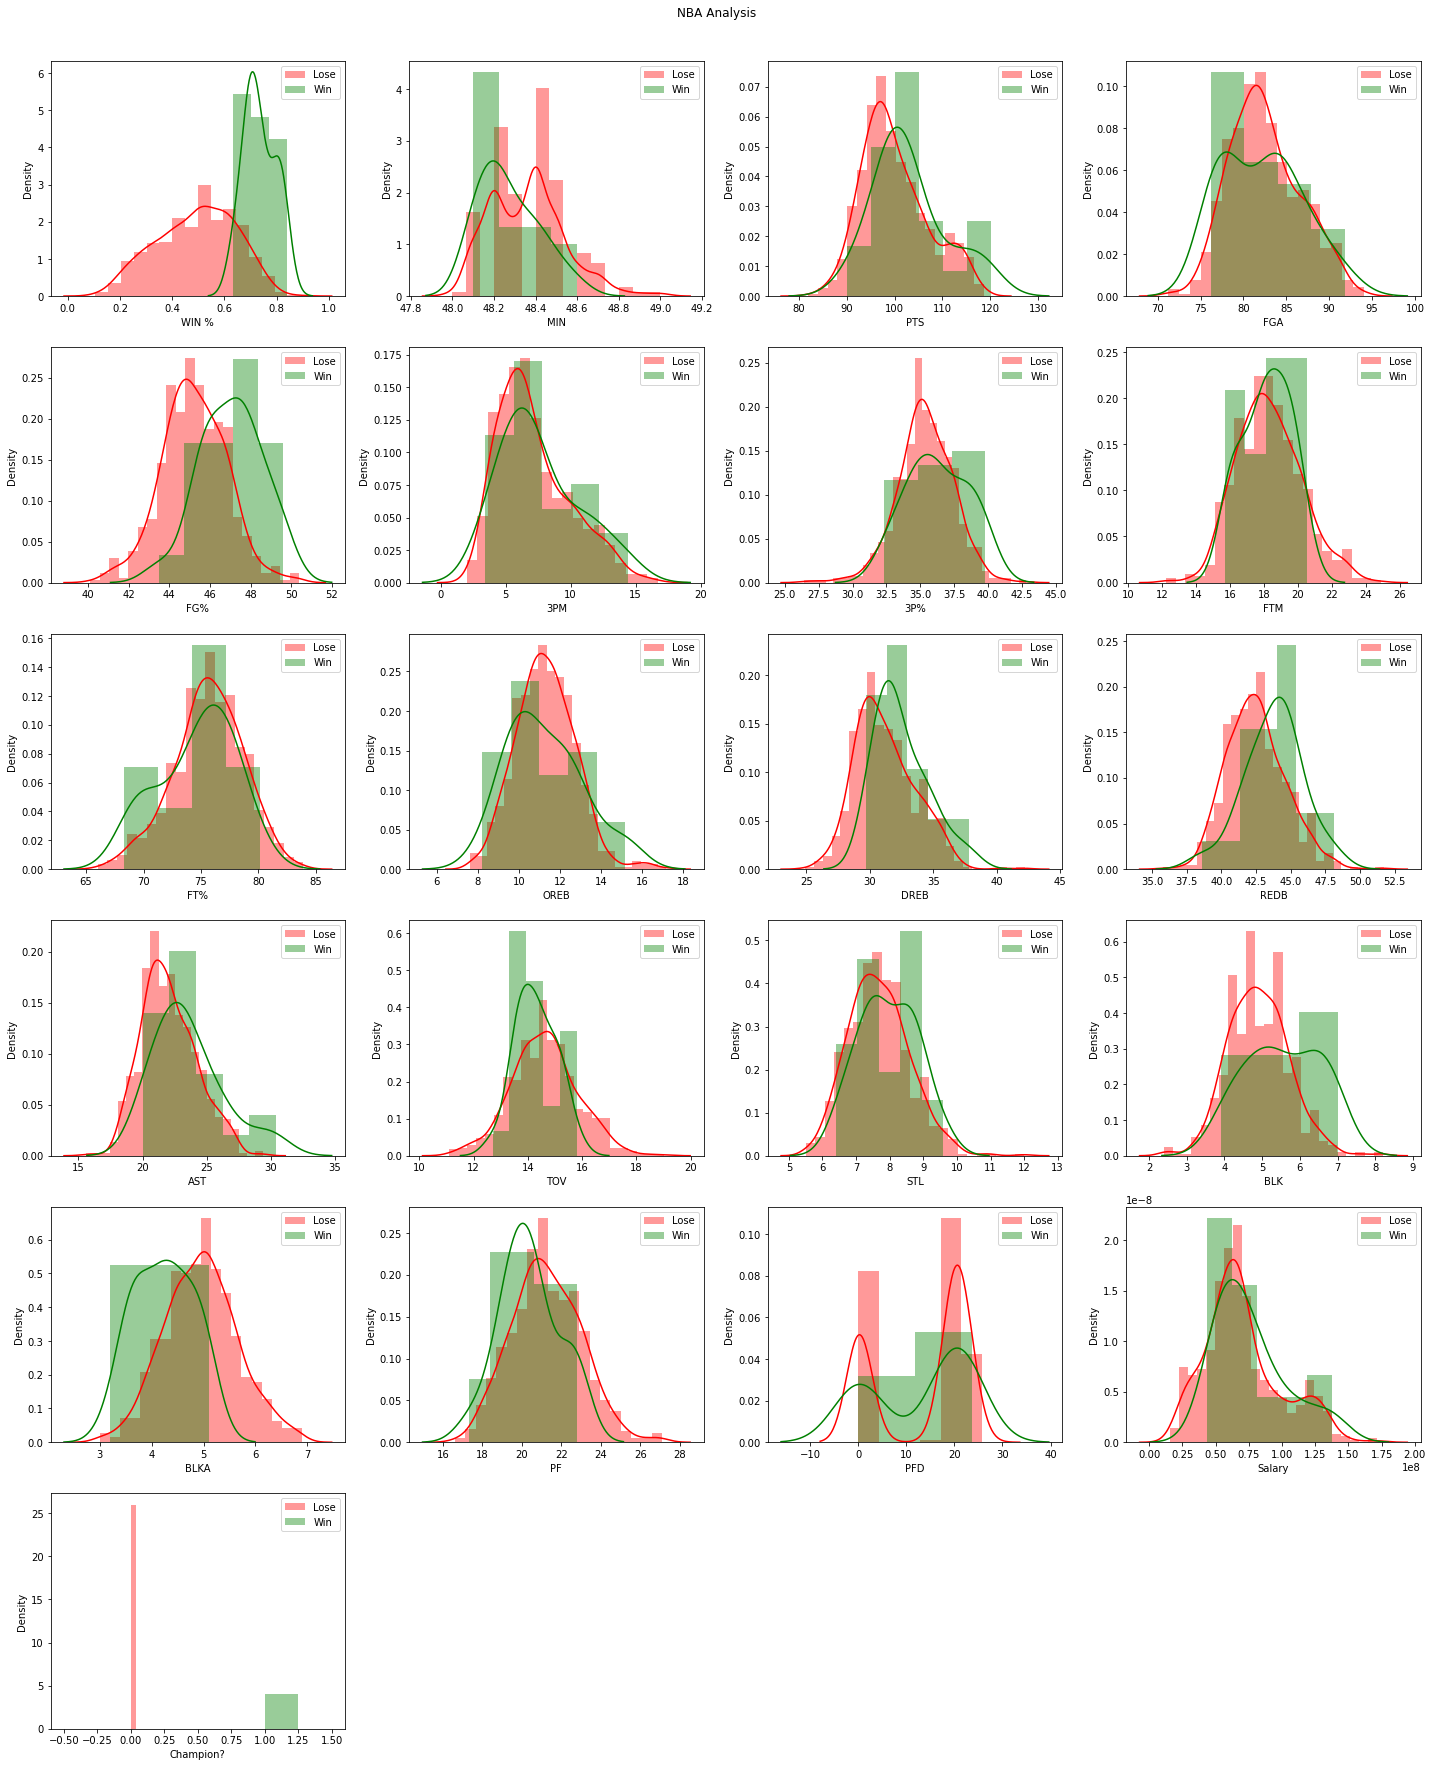

In [312]:
fig = plt.figure(figsize = (20, 25))
j = 0
for i in data.columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(final[i][result['Champion?']==0], color='r', label = 'Lose')
    sns.distplot(final[i][result['Champion?']==1], color='g', label = 'Win')
    plt.legend(loc='best')
fig.suptitle('NBA Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()